## CIFAR-10 and CIFAR-100 datasets

[CIFAR-10 and CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) are a pair of image classification datasets collected by collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. They are labelled subsets of the much larger [80 million tiny images](dataset). They are a common benchmark task for image classification - a list of current accuracy benchmarks for both data sets are maintained by Rodrigo Benenson [here](http://rodrigob.github.io/are_we_there_yet/build/).

As the name suggests, CIFAR-10 has images in 10 classes:

    airplane
    automobile
    bird 
    cat
    deer
    dog
    frog
    horse
    ship
    truck

with 6000 images per class for an overall dataset size of 60000. Each image has three (RGB) colour channels and pixel dimension 32×32, corresponding to a total dimension per input image of 3×32×32=3072. For each colour channel the input values have been normalised to the range [0, 1].

CIFAR-100 has images of identical dimensions to CIFAR-10 but rather than 10 classes they are instead split across 100 fine-grained classes (and 20 coarser 'superclasses' comprising multiple finer classes):

<table style='border: none;'>
    <tbody><tr style='font-weight: bold;'>
        <td>Superclass</td>
        <td>Classes</td>
    </tr>
    <tr>
        <td>aquatic mammals</td>
        <td>beaver, dolphin, otter, seal, whale</td>
    </tr>
    <tr>
        <td>fish</td>
        <td>aquarium fish, flatfish, ray, shark, trout</td>
    </tr>
    <tr>
        <td>flowers</td>
        <td>orchids, poppies, roses, sunflowers, tulips</td>
    </tr>
    <tr>
        <td>food containers</td>
        <td>bottles, bowls, cans, cups, plates</td>
    </tr>
    <tr>
        <td>fruit and vegetables</td>
        <td>apples, mushrooms, oranges, pears, sweet peppers</td>
    </tr>
    <tr>
        <td>household electrical devices</td>
        <td>clock, computer keyboard, lamp, telephone, television</td>
    </tr>
    <tr>
        <td>household furniture</td>
        <td>bed, chair, couch, table, wardrobe</td>
    </tr>
    <tr>
        <td>insects</td>
        <td>bee, beetle, butterfly, caterpillar, cockroach</td>
    </tr>
    <tr>
        <td>large carnivores</td>
        <td>bear, leopard, lion, tiger, wolf</td>
    </tr>
    <tr>
        <td>large man-made outdoor things</td>
        <td>bridge, castle, house, road, skyscraper</td>
    </tr>
    <tr>
        <td>large natural outdoor scenes</td>
        <td>cloud, forest, mountain, plain, sea</td>
    </tr>
    <tr>
        <td>large omnivores and herbivores</td>
        <td>camel, cattle, chimpanzee, elephant, kangaroo</td>
    </tr>
    <tr>
        <td>medium-sized mammals</td>
        <td>fox, porcupine, possum, raccoon, skunk</td>
    </tr>
    <tr>
        <td>non-insect invertebrates</td>
        <td>crab, lobster, snail, spider, worm</td>
    </tr>
    <tr>
        <td>people</td>
        <td>baby, boy, girl, man, woman</td>
    </tr>
    <tr>
        <td>reptiles</td>
        <td>crocodile, dinosaur, lizard, snake, turtle</td>
    </tr>
    <tr>
        <td>small mammals</td>
        <td>hamster, mouse, rabbit, shrew, squirrel</td>
    </tr>
    <tr>
        <td>trees</td>
        <td>maple, oak, palm, pine, willow</td>
    </tr>
    <tr>
        <td>vehicles 1</td>
        <td>bicycle, bus, motorcycle, pickup truck, train</td>
    </tr>
    <tr>
        <td>vehicles 2</td>
        <td>lawn-mower, rocket, streetcar, tank, tractor</td>
    </tr>
</tbody></table>

Each class has 600 examples in it, giving an overall dataset size of 60000 i.e. the same as CIFAR-10.

Both CIFAR-10 and CIFAR-100 have standard splits into 50000 training examples and 10000 test examples. For CIFAR-100 as there is an optional Kaggle competition (see below) scored on predictions on the test set, we have used a non-standard assignation of examples to test and training set and only provided the inputs (and not target labels) for the 10000 examples chosen for the test set. 

For CIFAR-10 the 10000 test set examples have labels provided: to avoid any accidental over-fitting to the test set **you should only use these for the final evaluation of your model(s)**. If you repeatedly evaluate models on the test set during model development it is easy to end up indirectly fitting to the test labels - for those who have not already read it see this [excellent cautionary note from the MLPR notes by Iain Murray](http://www.inf.ed.ac.uk/teaching/courses/mlpr/2016/notes/w2a_train_test_val.html#warning-dont-fool-yourself-or-make-a-fool-of-yourself). 

For both CIFAR-10 and CIFAR-100, the remaining 50000 non-test examples have been split in to a 40000 example training dataset and a 10000 example validation dataset, each with target labels provided. If you wish to use a more complex cross-fold validation scheme you may want to combine these two portions of the dataset and define your own functions for separating out a validation set.

Data provider classes for both CIFAR-10 and CIFAR-100 are available in the `mlp.data_providers` module. Both have similar behaviour to the `MNISTDataProvider` used extensively last semester. A `which_set` argument can be used to specify whether to return a data provided for the training dataset (`which_set='train'`) or validation dataset (`which_set='valid'`).

The CIFAR-100 data provider also takes an optional `use_coarse_targets` argument in its constructor. By default this is set to `False` and the targets returned by the data provider correspond to 1-of-K encoded binary vectors for the 100 fine-grained object classes. If `use_coarse_targets=True` then instead the data provider will return 1-of-K encoded binary vector targets for the 20 coarse-grained superclasses associated with each input instead.

Both data provider classes provide a `label_map` attribute which is a list of strings which are the class labels corresponding to the integer targets (i.e. prior to conversion to a 1-of-K encoded binary vector).

### Accessing the CIFAR-10 and CIFAR-100 data

Before using the data provider objects you will need to make sure the data files are accessible to the `mlp` package by existing under the directory specified by the `MLP_DATA_DIR` path.

The data is available as compressed NumPy `.npz` files

    cifar-10-train.npz           235MB
    cifar-10-valid.npz            59MB
    cifar-10-test-inputs.npz      59MB
    cifar-10-test-targets.npz     10KB
    cifar-100-train.npz          235MB
    cifar-100-valid.npz           59MB
    cifar-100-test-inputs.npz     59MB


in the AFS directory `/afs/inf.ed.ac.uk/group/teaching/mlp/data`.

If you are working on DICE one option is to redefine your `MLP_DATA_DIR` to directly point to the shared AFS data directory by editing the `env_vars.sh` start up file for your environment. This will avoid using up your DICE quota by storing the data files in your homespace but may involve slower initial loading of the data on initialising the data providers if many people are trying access the same files at once. The environment variable can be redefined by running

```
gedit ~/miniconda2/envs/mlp/etc/conda/activate.d/env_vars.sh
```

in a terminal window (assuming you installed `miniconda2` to your home directory), and changing the line

```
export MLP_DATA_DIR=$HOME/mlpractical/data
```

to

```
export MLP_DATA_DIR="/afs/inf.ed.ac.uk/group/teaching/mlp/data"
```

and then saving and closing the editor. You will need reload the `mlp` environment using `source activate mlp` and restart the Jupyter notebook server in the reloaded environment for the new environment variable definition to be available.

For those working on DICE who have sufficient quota remaining or those using there own machine, an alternative option is to copy the data files in to your local `mlp/data` directory (or wherever your `MLP_DATA_DIR` environment variable currently points to if different). 


Assuming your local `mlpractical` repository is in your home directory you should be able to copy the required files on DICE by running

```
cp /afs/inf.ed.ac.uk/group/teaching/mlp/data/cifar*.npz ~/mlpractical/data
```

On a non-DICE machine, you will need to either [set up local access to AFS](http://computing.help.inf.ed.ac.uk/informatics-filesystem), use a remote file transfer client like `scp` or you can alternatively download the files using the iFile web interface [here](https://ifile.inf.ed.ac.uk/?path=%2Fafs%2Finf.ed.ac.uk%2Fgroup%2Fteaching%2Fmlp%2Fdata&goChange=Go) (requires DICE credentials).

As some of the files are quite large you may wish to copy only those you are using currently (e.g. only the files for one of the two tasks) to your local filespace to avoid filling up your quota. The `cifar-100-test-inputs.npz` file will only be needed by those intending to enter the associated optional Kaggle competition.

## Example two-layer classifier models

Below example code is given for creating instances of the CIFAR-10 and CIFAR-100 data provider objects and using them to train simple two-layer feedforward network models with rectified linear activations in TensorFlow. You may wish to use this code as a starting point for your own experiments.

In [1]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
%matplotlib inline

### CIFAR-10

In [11]:
train_data = CIFAR10DataProvider('train', batch_size=50)
valid_data = CIFAR10DataProvider('valid', batch_size=50)

In [12]:
#Baseline
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
        
    return (weights,biases,outputs)

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 400
#learning rate
learning_rate = 0.001
train_acc_lists = [[] for i in range(100)]
train_err_lists = [[] for i in range(100)]
valid_acc_lists = [[] for i in range(100)]
valid_err_lists = [[] for i in range(100)]


with tf.name_scope('fc-layer-1'):
    (hidden1_weights,hidden1_biases,hidden_1) = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)


with tf.name_scope('output-layer'):
    (out_weights,out_biases,outputs) = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)


with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(error)


init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)

    for e in range(100):

        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches

        train_acc_lists[0].append(running_accuracy)
        train_err_lists[0].append(running_error)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))

        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches

        valid_acc_lists[0].append(valid_accuracy)
        valid_err_lists[0].append(valid_error)
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))


End of epoch 01: err(train)=1.92 acc(train)=0.32
                 err(valid)=1.82 acc(valid)=0.36
End of epoch 02: err(train)=1.76 acc(train)=0.38
                 err(valid)=1.73 acc(valid)=0.40
End of epoch 03: err(train)=1.70 acc(train)=0.40
                 err(valid)=1.71 acc(valid)=0.40
End of epoch 04: err(train)=1.66 acc(train)=0.42
                 err(valid)=1.67 acc(valid)=0.41
End of epoch 05: err(train)=1.62 acc(train)=0.43
                 err(valid)=1.63 acc(valid)=0.44
End of epoch 06: err(train)=1.59 acc(train)=0.45
                 err(valid)=1.60 acc(valid)=0.44
End of epoch 07: err(train)=1.57 acc(train)=0.45
                 err(valid)=1.64 acc(valid)=0.43
End of epoch 08: err(train)=1.55 acc(train)=0.46
                 err(valid)=1.63 acc(valid)=0.43
End of epoch 09: err(train)=1.53 acc(train)=0.47
                 err(valid)=1.62 acc(valid)=0.43
End of epoch 10: err(train)=1.52 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.46
End of epoch 11: err

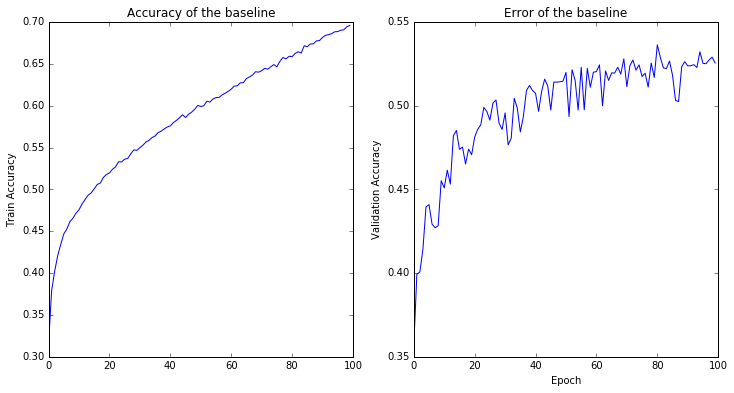

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(100) #30 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Sets x-axis
#ax1.set_xlabel('Epoch')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Accuracy of the baseline")

ax2.set_xlabel('Epoch')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Error of the baseline")




ax1.plot(x,train_acc_lists[0]) 
ax2.plot(x,valid_acc_lists[0]) 

ax1.legend(loc=0)
ax2.legend(loc=0)

fig.savefig('10_baseline.png')


In [28]:
#Different learning schedule
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
        
    return outputs

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
#learning rate
learning_rate = 0.001
train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for layer_num in range(5):
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)


    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
    if layer_num == 0:
        with tf.name_scope('train'):
            train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)
    elif layer_num == 1:
        with tf.name_scope('train'):
            train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)
    elif layer_num == 2:
        with tf.name_scope('train'):
            train_step = tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(error)
    elif layer_num == 3:
        with tf.name_scope('train'):
            train_step = tf.train.AdagradOptimizer(learning_rate).minimize(error)
    elif layer_num == 4:
        with tf.name_scope('train'):
            train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(error)
           
        
    init = tf.global_variables_initializer()


    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[layer_num].append(running_accuracy)
            train_err_lists[layer_num].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[layer_num].append(valid_accuracy)
            valid_err_lists[layer_num].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
            

End of epoch 01: err(train)=1.34 acc(train)=0.20
                 err(valid)=1.90 acc(valid)=0.32
End of epoch 02: err(train)=1.74 acc(train)=0.38
                 err(valid)=1.68 acc(valid)=0.40
End of epoch 03: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.67 acc(valid)=0.40
End of epoch 04: err(train)=1.58 acc(train)=0.44
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 05: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 06: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 07: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.51 acc(valid)=0.47
End of epoch 08: err(train)=1.43 acc(train)=0.49
                 err(valid)=1.56 acc(valid)=0.45
End of epoch 09: err(train)=1.41 acc(train)=0.50
                 err(valid)=1.44 acc(valid)=0.49
End of epoch 10: err(train)=1.38 acc(train)=0.51
                 err(valid)=1.47 acc(valid)=0.48
End of epoch 11: err

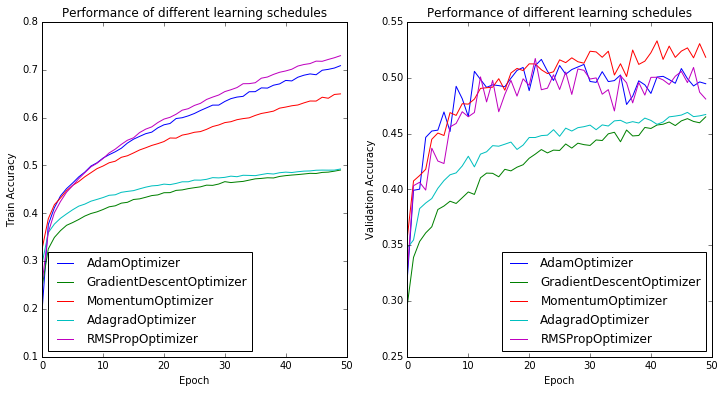

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['AdamOptimizer','GradientDescentOptimizer','MomentumOptimizer','AdagradOptimizer','RMSPropOptimizer']
x = np.arange(50) #30 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different learning schedules")
ax2.set_xlabel('Epoch')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different learning schedules")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('diff_schedule_acc.png')




In [46]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
        
    return (weights,biases,outputs)

In [63]:
###Test performance of different regularizations

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
#learning rate
learning_rate = 0.0005

train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for layer_num in range(2):
    if layer_num == 0: # no regularization
        with tf.name_scope('fc-layer-1'):
            hidden_weights,hidden_weights,hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)

        with tf.name_scope('output-layer'):
            out_weights,out_biases,outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)
    
        with tf.name_scope('error'):
            error = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
            
    elif layer_num == 1: #L2 regularization
        with tf.name_scope('fc-layer-1'):
            hidden_weights,hidden_weights,hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)

        with tf.name_scope('output-layer'):
            out_weights,out_biases,outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)
    
        with tf.name_scope('error'):
            error = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(outputs, targets)
                   + 0.01*tf.nn.l2_loss(hidden_weights) 
                   + 0.01*tf.nn.l2_loss(hidden_weights) 
                   + 0.01*tf.nn.l2_loss(out_weights) 
                   + 0.01*tf.nn.l2_loss(out_biases))
            
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
        tf.summary.scalar('accuracy', accuracy)

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc

            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            train_acc_lists[layer_num].append(running_accuracy)
            train_err_lists[layer_num].append(running_error)

            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches

            valid_acc_lists[layer_num].append(valid_accuracy)
            valid_err_lists[layer_num].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))


End of epoch 01: err(train)=1.90 acc(train)=0.33
                 err(valid)=1.77 acc(valid)=0.37
End of epoch 02: err(train)=1.69 acc(train)=0.40
                 err(valid)=1.66 acc(valid)=0.42
End of epoch 03: err(train)=1.61 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 04: err(train)=1.56 acc(train)=0.45
                 err(valid)=1.62 acc(valid)=0.43
End of epoch 05: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.54 acc(valid)=0.46
End of epoch 06: err(train)=1.48 acc(train)=0.47
                 err(valid)=1.54 acc(valid)=0.46
End of epoch 07: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.52 acc(valid)=0.47
End of epoch 08: err(train)=1.43 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.47
End of epoch 09: err(train)=1.41 acc(train)=0.50
                 err(valid)=1.55 acc(valid)=0.45
End of epoch 10: err(train)=1.39 acc(train)=0.51
                 err(valid)=1.46 acc(valid)=0.49
End of epoch 11: err

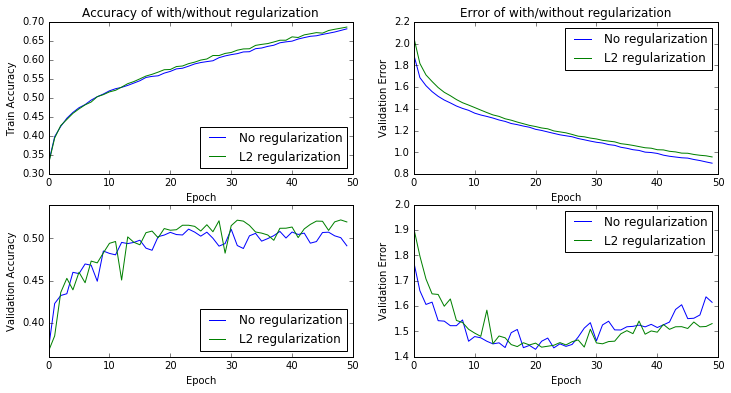

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
line_name = ['No regularization','L2 regularization']
x = np.arange(50) #30 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,2)
ax4 = fig.add_subplot(2,2,4)
# Sets x-axis
ax1.set_xlabel('Epoch')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Accuracy of with/without regularization")
ax2.set_xlabel('Epoch')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
#ax2.set_title("Error of different learning schedules")
ax3.set_xlabel('Epoch')
# Sets y-axis
ax3.set_ylabel('Validation Error')
# Sets title
ax3.set_title("Error of with/without regularization")
ax4.set_xlabel('Epoch')
# Sets y-axis
ax4.set_ylabel('Validation Error')
# Sets title
#ax4.set_title("Performance of different learning schedules")

for layer_num in range(2):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
    ax3.plot(x,train_err_lists[layer_num],label=line_name[layer_num]) 
    ax4.plot(x,valid_err_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
ax3.legend(loc=0)
ax4.legend(loc=0)
fig.savefig('diff_regularization.png')



In [40]:
###Test performance of different normalization
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 100
#learning rate
learning_rate = 0.001

train_acc_lists = [[] for i in range(10)]
train_err_lists = [[] for i in range(10)]
valid_acc_lists = [[] for i in range(10)]
valid_err_lists = [[] for i in range(10)]

for layer_num in range(2):
    if layer_num == 1: # no normalization
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
            return outputs
            
    elif layer_num == 0: #normalization
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
            outputs = tf.nn.l2_normalize(outputs, 1, epsilon=1e-12)
            return outputs
              
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
            
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)
        
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
        
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
        tf.summary.scalar('accuracy', accuracy)

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for e in range(10):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc

            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            train_acc_lists[layer_num].append(running_accuracy)
            train_err_lists[layer_num].append(running_error)

            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches

            valid_acc_lists[layer_num].append(valid_accuracy)
            valid_err_lists[layer_num].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))


End of epoch 01: err(train)=2.09 acc(train)=0.32
                 err(valid)=2.05 acc(valid)=0.35
End of epoch 02: err(train)=2.02 acc(train)=0.39
                 err(valid)=2.01 acc(valid)=0.38
End of epoch 03: err(train)=1.99 acc(train)=0.41
                 err(valid)=2.02 acc(valid)=0.38
End of epoch 04: err(train)=1.97 acc(train)=0.42
                 err(valid)=1.96 acc(valid)=0.43
End of epoch 05: err(train)=1.96 acc(train)=0.44
                 err(valid)=1.97 acc(valid)=0.43
End of epoch 06: err(train)=1.95 acc(train)=0.45
                 err(valid)=1.95 acc(valid)=0.45
End of epoch 07: err(train)=1.94 acc(train)=0.45
                 err(valid)=1.95 acc(valid)=0.44
End of epoch 08: err(train)=1.94 acc(train)=0.46
                 err(valid)=1.95 acc(valid)=0.44
End of epoch 09: err(train)=1.93 acc(train)=0.47
                 err(valid)=1.94 acc(valid)=0.45
End of epoch 10: err(train)=1.93 acc(train)=0.47
                 err(valid)=1.94 acc(valid)=0.45
End of epoch 01: err

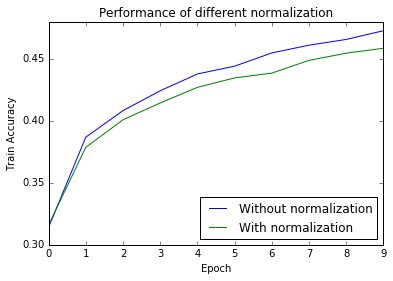

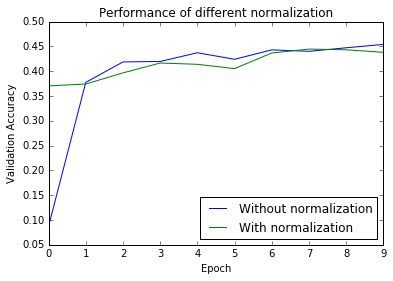

In [37]:
import matplotlib.pyplot as plt

line_name = ['Without normalization','With normalization']
x = np.arange(10) #10 epoch

# plot train accuracy
train_acc_fig = plt.figure()

# Sets x-axis
plt.xlabel('Epoch')
# Sets y-axis
plt.ylabel('Train Accuracy')
# Sets title
plt.title("Performance of different normalization")

for layer_num in range(2):
    plt.plot(x,train_acc_lists[layer_num],label=line_name[layer_num])   
plt.legend(loc='best')
train_acc_fig.savefig('diff_normal_train_acc.png', dpi=train_acc_fig.dpi)

# plot valid accuracy
valid_acc_fig = plt.figure()

# Sets x-axis
plt.xlabel('Epoch')
# Sets y-axis
plt.ylabel('Validation Accuracy')
# Sets title
plt.title("Performance of different normalization")

for layer_num in range(2):
    plt.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num])   
plt.legend(loc='best')
valid_acc_fig.savefig('diff_normal_valid_acc.png', dpi=valid_acc_fig.dpi)

In [22]:
###Test performance of different number of layers

def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
        
    return outputs

In [23]:
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for layer_num in range(5):
    if layer_num == 0:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)
    elif layer_num == 1:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    elif layer_num == 2:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-3'):
            hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_3, num_hidden, train_data.num_classes, tf.identity)
    elif layer_num == 3:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-3'):
            hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-4'):
            hidden_4 = fully_connected_layer(hidden_3, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_4, num_hidden, train_data.num_classes, tf.identity) 
    else:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-3'):
            hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-4'):
            hidden_4 = fully_connected_layer(hidden_3, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-5'):
            hidden_5 = fully_connected_layer(hidden_4, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_5, num_hidden, train_data.num_classes, tf.identity) 

    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()



    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[layer_num].append(running_accuracy)
            train_err_lists[layer_num].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[layer_num].append(valid_accuracy)
            valid_err_lists[layer_num].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))


End of epoch 01: err(train)=1.95 acc(train)=0.32
                 err(valid)=1.85 acc(valid)=0.34
End of epoch 02: err(train)=1.72 acc(train)=0.39
                 err(valid)=1.71 acc(valid)=0.40
End of epoch 03: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.65 acc(valid)=0.41
End of epoch 04: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.43
End of epoch 05: err(train)=1.57 acc(train)=0.44
                 err(valid)=1.59 acc(valid)=0.45
End of epoch 06: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 07: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 08: err(train)=1.50 acc(train)=0.47
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 09: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.59 acc(valid)=0.44
End of epoch 10: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.57 acc(valid)=0.45
End of epoch 11: err

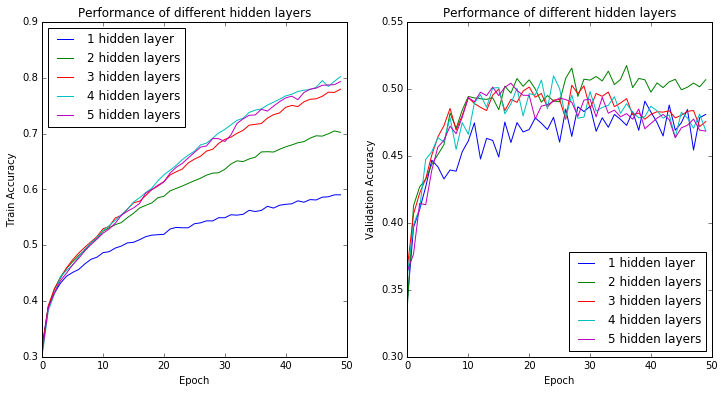

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['1 hidden layer','2 hidden layers','3 hidden layers','4 hidden layers','5 hidden layers']
x = np.arange(50) #50 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different hidden layers")
ax2.set_xlabel('Epoch')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different hidden layers")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('diff_layer_acc.png')




In [25]:
###Test performance of different hidden units number

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

num_hidden_lists = [100,200,300,400,500]

train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for num_hidden in num_hidden_lists:
    index = (num_hidden/100 - 1)
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[index].append(running_accuracy)
            train_err_lists[index].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[index].append(valid_accuracy)
            valid_err_lists[index].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=1.91 acc(train)=0.32
                 err(valid)=1.77 acc(valid)=0.37
End of epoch 02: err(train)=1.71 acc(train)=0.39
                 err(valid)=1.67 acc(valid)=0.40
End of epoch 03: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.72 acc(valid)=0.40
End of epoch 04: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.60 acc(valid)=0.43
End of epoch 05: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.61 acc(valid)=0.42
End of epoch 06: err(train)=1.51 acc(train)=0.46
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 07: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.43
End of epoch 08: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.60 acc(valid)=0.45
End of epoch 09: err(train)=1.43 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.46
End of epoch 10: err(train)=1.41 acc(train)=0.49
                 err(valid)=1.51 acc(valid)=0.46
End of epoch 11: err

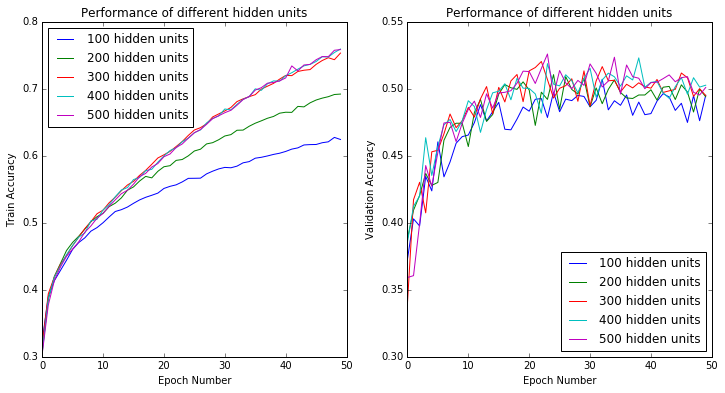

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['100 hidden units','200 hidden units','300 hidden units','400 hidden units','500 hidden units']
x = np.arange(50) #50 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch Number')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different hidden units")
ax2.set_xlabel('Epoch Number')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different hidden units")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('diff_units_acc.png')




In [15]:
#try different active functions
# 1.tf.nn.relu
# 2.tf.nn.sigmoid
# 3.tf.nn.tanh
# 4.tf.nn.softsign
# 5.tf.nn.elu
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

num_hidden = 200

train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for func_type_type in range(5):
    if func_type_type == 0:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 1:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.sigmoid): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 2:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.tanh): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 3:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.softsign): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 4:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
        
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[func_type_type].append(running_accuracy)
            train_err_lists[func_type_type].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[func_type_type].append(valid_accuracy)
            valid_err_lists[func_type_type].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=0.93 acc(train)=0.13
                 err(valid)=1.82 acc(valid)=0.35
End of epoch 02: err(train)=1.77 acc(train)=0.37
                 err(valid)=1.74 acc(valid)=0.37
End of epoch 03: err(train)=1.67 acc(train)=0.40
                 err(valid)=1.72 acc(valid)=0.39
End of epoch 04: err(train)=1.60 acc(train)=0.43
                 err(valid)=1.58 acc(valid)=0.44
End of epoch 05: err(train)=1.55 acc(train)=0.45
                 err(valid)=1.57 acc(valid)=0.44
End of epoch 06: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.54 acc(valid)=0.45
End of epoch 07: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.60 acc(valid)=0.44
End of epoch 08: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.44
End of epoch 09: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.53 acc(valid)=0.46
End of epoch 10: err(train)=1.42 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.47
End of epoch 11: err

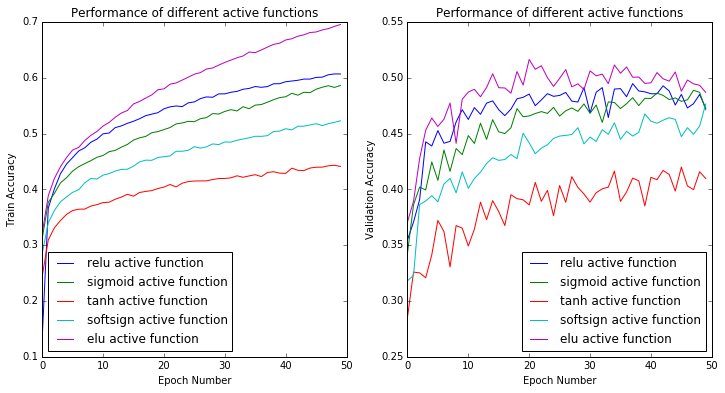

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['relu active function','sigmoid active function','tanh active function','softsign active function','elu active function']
x = np.arange(50) #50 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch Number')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different active functions")

ax2.set_xlabel('Epoch Number')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different active functions")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('diff_active_func_acc.png')



In [74]:
#try different learning rate

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

index = -1
num_hidden = 200
#learning rate
learning_rate_list = [0.00001,0.0001,0.001,0.01,0.1]
train_acc_lists = [[] for i in range(10)]
train_err_lists = [[] for i in range(10)]
valid_acc_lists = [[] for i in range(10)]
valid_err_lists = [[] for i in range(10)]

for learning_rate in learning_rate_list:
    index += 1
    def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu): 
        weights = tf.Variable(
            tf.truncated_normal(
                [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
            'weights')
        biases = tf.Variable(tf.zeros([output_dim]), 'biases')
        outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
        return outputs
     
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(error)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for e in range(10):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[index].append(running_accuracy)
            train_err_lists[index].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[index].append(valid_accuracy)
            valid_err_lists[index].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))
            

End of epoch 01: err(train)=2.06 acc(train)=0.27
                 err(valid)=1.94 acc(valid)=0.31
End of epoch 02: err(train)=1.89 acc(train)=0.33
                 err(valid)=1.87 acc(valid)=0.34
End of epoch 03: err(train)=1.83 acc(train)=0.36
                 err(valid)=1.82 acc(valid)=0.36
End of epoch 04: err(train)=1.79 acc(train)=0.37
                 err(valid)=1.78 acc(valid)=0.38
End of epoch 05: err(train)=1.76 acc(train)=0.38
                 err(valid)=1.76 acc(valid)=0.38
End of epoch 06: err(train)=1.73 acc(train)=0.40
                 err(valid)=1.74 acc(valid)=0.39
End of epoch 07: err(train)=1.71 acc(train)=0.40
                 err(valid)=1.72 acc(valid)=0.40
End of epoch 08: err(train)=1.69 acc(train)=0.41
                 err(valid)=1.70 acc(valid)=0.40
End of epoch 09: err(train)=1.67 acc(train)=0.42
                 err(valid)=1.68 acc(valid)=0.42
End of epoch 10: err(train)=1.65 acc(train)=0.42
                 err(valid)=1.68 acc(valid)=0.41
End of epoch 01: err

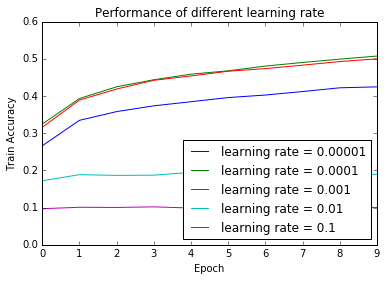

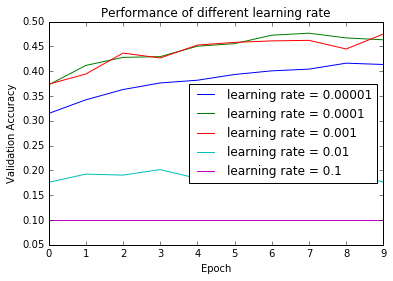

In [75]:
import matplotlib.pyplot as plt

line_name = ['learning rate = 0.00001','learning rate = 0.0001','learning rate = 0.001','learning rate = 0.01','learning rate = 0.1']
x = np.arange(10) #10 epoch

# plot train accuracy
train_acc_fig = plt.figure()

# Sets x-axis
plt.xlabel('Epoch')
# Sets y-axis
plt.ylabel('Train Accuracy')
# Sets title
plt.title("Performance of different learning rate")

for index in range(5):
    plt.plot(x,train_acc_lists[index],label=line_name[index])   
plt.legend(loc='best')
train_acc_fig.savefig('diff_learning_rate_train_acc.png', dpi=train_acc_fig.dpi)

# plot valid accuracy
valid_acc_fig = plt.figure()

# Sets x-axis
plt.xlabel('Epoch')
# Sets y-axis
plt.ylabel('Validation Accuracy')
# Sets title
plt.title("Performance of different learning rate")

for index in range(5):
    plt.plot(x,valid_acc_lists[index],label=line_name[index])   
plt.legend(loc='best')
valid_acc_fig.savefig('diff_learning_rate_valid_acc.png', dpi=valid_acc_fig.dpi)

### CIFAR-100

In [16]:
train_data = CIFAR100DataProvider('train', batch_size=50)
valid_data = CIFAR100DataProvider('valid', batch_size=50)

In [31]:
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
        
    return outputs

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(init)
for e in range(10):
    running_error = 0.
    running_accuracy = 0.
    for input_batch, target_batch in train_data:
        _, batch_error, batch_acc = sess.run(
            [train_step, error, accuracy], 
            feed_dict={inputs: input_batch, targets: target_batch})
        running_error += batch_error
        running_accuracy += batch_acc
    running_error /= train_data.num_batches
    running_accuracy /= train_data.num_batches
    print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
          .format(e + 1, running_error, running_accuracy))
    if (e + 1) % 5 == 0:
        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))

In [34]:
#Different learning schedule


inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
#learning rate
train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for layer_num in range(5):
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)


    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
    if layer_num == 0:
        with tf.name_scope('train'):
            train_step = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(error)
    elif layer_num == 1:
        with tf.name_scope('train'):
            train_step = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(error)
    elif layer_num == 2:
        with tf.name_scope('train'):
            train_step = tf.train.MomentumOptimizer(learning_rate = 0.001,momentum=0.9).minimize(error)
    elif layer_num == 3:
        with tf.name_scope('train'):
            train_step = tf.train.AdagradOptimizer(learning_rate = 0.001).minimize(error)
    elif layer_num == 4:
        with tf.name_scope('train'):
            train_step = tf.train.RMSPropOptimizer(learning_rate = 0.001).minimize(error)
           
        
    init = tf.global_variables_initializer()


    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[layer_num].append(running_accuracy)
            train_err_lists[layer_num].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[layer_num].append(valid_accuracy)
            valid_err_lists[layer_num].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))         

End of epoch 01: err(train)=1.58 acc(train)=0.02
                 err(valid)=4.09 acc(valid)=0.07
End of epoch 02: err(train)=3.87 acc(train)=0.11
                 err(valid)=3.77 acc(valid)=0.13
End of epoch 03: err(train)=3.64 acc(train)=0.15
                 err(valid)=3.62 acc(valid)=0.15
End of epoch 04: err(train)=3.51 acc(train)=0.17
                 err(valid)=3.50 acc(valid)=0.17
End of epoch 05: err(train)=3.41 acc(train)=0.19
                 err(valid)=3.46 acc(valid)=0.18
End of epoch 06: err(train)=3.33 acc(train)=0.20
                 err(valid)=3.48 acc(valid)=0.18
End of epoch 07: err(train)=3.26 acc(train)=0.21
                 err(valid)=3.43 acc(valid)=0.19
End of epoch 08: err(train)=3.20 acc(train)=0.22
                 err(valid)=3.40 acc(valid)=0.19
End of epoch 09: err(train)=3.15 acc(train)=0.23
                 err(valid)=3.40 acc(valid)=0.20
End of epoch 10: err(train)=3.11 acc(train)=0.24
                 err(valid)=3.36 acc(valid)=0.21
End of epoch 11: err

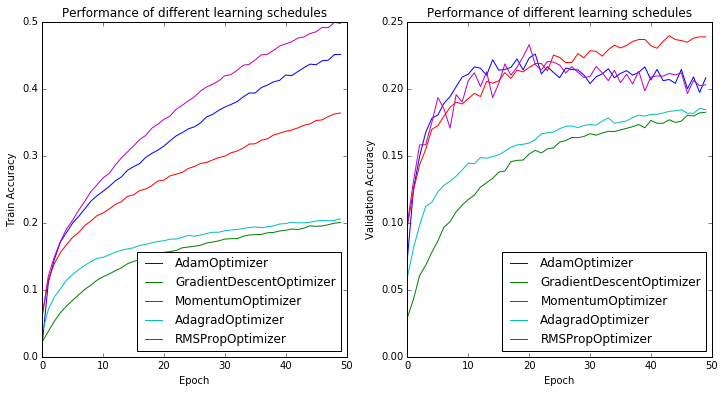

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['AdamOptimizer','GradientDescentOptimizer','MomentumOptimizer','AdagradOptimizer','RMSPropOptimizer']
x = np.arange(50) #30 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different learning schedules")
ax2.set_xlabel('Epoch')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different learning schedules")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('100_diff_schedule_acc.png')

In [10]:
###Test performance of different number of layers
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for layer_num in range(5):
    if layer_num == 0:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)
    elif layer_num == 1:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    elif layer_num == 2:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-3'):
            hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_3, num_hidden, train_data.num_classes, tf.identity)
    elif layer_num == 3:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-3'):
            hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-4'):
            hidden_4 = fully_connected_layer(hidden_3, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_4, num_hidden, train_data.num_classes, tf.identity) 
    else:
        with tf.name_scope('fc-layer-1'):
            hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
        with tf.name_scope('fc-layer-2'):
            hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-3'):
            hidden_3 = fully_connected_layer(hidden_2, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-4'):
            hidden_4 = fully_connected_layer(hidden_3, num_hidden, num_hidden)
        with tf.name_scope('fc-layer-5'):
            hidden_5 = fully_connected_layer(hidden_4, num_hidden, num_hidden)
        with tf.name_scope('output-layer'):
            outputs = fully_connected_layer(hidden_5, num_hidden, train_data.num_classes, tf.identity) 

    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))

    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()



    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[layer_num].append(running_accuracy)
            train_err_lists[layer_num].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[layer_num].append(valid_accuracy)
            valid_err_lists[layer_num].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))


End of epoch 01: err(train)=4.24 acc(train)=0.07
                 err(valid)=3.94 acc(valid)=0.10
End of epoch 02: err(train)=3.82 acc(train)=0.12
                 err(valid)=3.81 acc(valid)=0.12
End of epoch 03: err(train)=3.67 acc(train)=0.15
                 err(valid)=3.65 acc(valid)=0.15
End of epoch 04: err(train)=3.58 acc(train)=0.16
                 err(valid)=3.57 acc(valid)=0.16
End of epoch 05: err(train)=3.51 acc(train)=0.17
                 err(valid)=3.58 acc(valid)=0.17
End of epoch 06: err(train)=3.46 acc(train)=0.18
                 err(valid)=3.54 acc(valid)=0.16
End of epoch 07: err(train)=3.42 acc(train)=0.19
                 err(valid)=3.54 acc(valid)=0.16
End of epoch 08: err(train)=3.38 acc(train)=0.20
                 err(valid)=3.52 acc(valid)=0.18
End of epoch 09: err(train)=3.36 acc(train)=0.20
                 err(valid)=3.54 acc(valid)=0.17
End of epoch 10: err(train)=3.33 acc(train)=0.21
                 err(valid)=3.57 acc(valid)=0.17
End of epoch 11: err

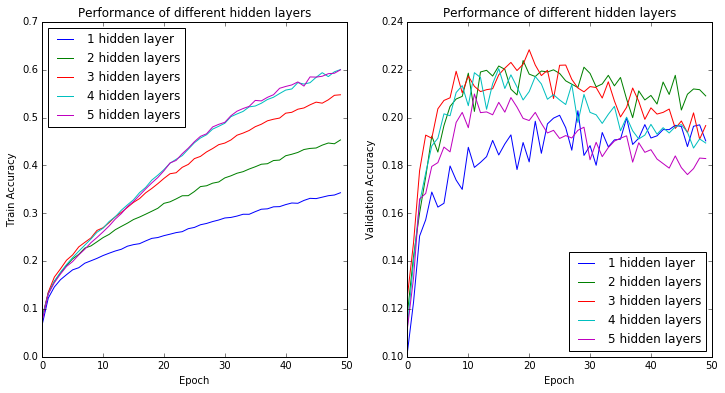

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['1 hidden layer','2 hidden layers','3 hidden layers','4 hidden layers','5 hidden layers']
x = np.arange(50) #50 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different hidden layers")
ax2.set_xlabel('Epoch')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different hidden layers")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('100_diff_layer_acc.png')




In [41]:
###Test performance of different hidden units number

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

num_hidden_lists = [100,200,300,400,500]

train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for num_hidden in num_hidden_lists:
    index = (num_hidden/100 - 1)
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[index].append(running_accuracy)
            train_err_lists[index].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[index].append(valid_accuracy)
            valid_err_lists[index].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=4.14 acc(train)=0.07
                 err(valid)=3.84 acc(valid)=0.11
End of epoch 02: err(train)=3.73 acc(train)=0.13
                 err(valid)=3.66 acc(valid)=0.15
End of epoch 03: err(train)=3.58 acc(train)=0.16
                 err(valid)=3.57 acc(valid)=0.16
End of epoch 04: err(train)=3.49 acc(train)=0.17
                 err(valid)=3.55 acc(valid)=0.17
End of epoch 05: err(train)=3.41 acc(train)=0.19
                 err(valid)=3.47 acc(valid)=0.18
End of epoch 06: err(train)=3.35 acc(train)=0.20
                 err(valid)=3.42 acc(valid)=0.19
End of epoch 07: err(train)=3.29 acc(train)=0.21
                 err(valid)=3.39 acc(valid)=0.20
End of epoch 08: err(train)=3.24 acc(train)=0.22
                 err(valid)=3.40 acc(valid)=0.19
End of epoch 09: err(train)=3.21 acc(train)=0.23
                 err(valid)=3.37 acc(valid)=0.20
End of epoch 10: err(train)=3.16 acc(train)=0.23
                 err(valid)=3.36 acc(valid)=0.20
End of epoch 11: err

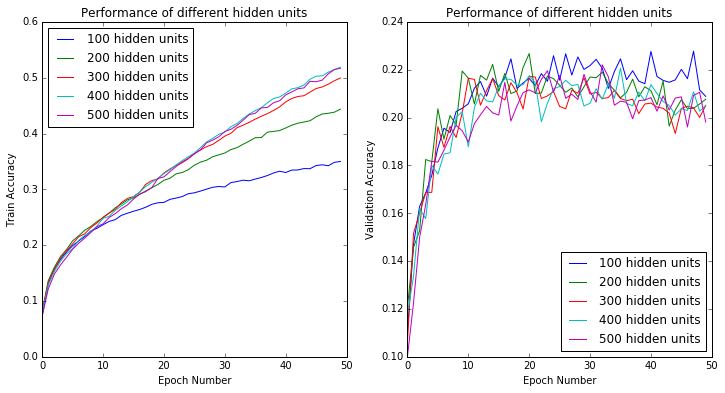

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['100 hidden units','200 hidden units','300 hidden units','400 hidden units','500 hidden units']
x = np.arange(50) #50 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch Number')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different hidden units")
ax2.set_xlabel('Epoch Number')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different hidden units")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('100_diff_units_acc.png')

In [38]:
#try different active functions
# 1.tf.nn.relu
# 2.tf.nn.sigmoid
# 3.tf.nn.relu6
# 4.tf.nn.softsign
# 5.tf.nn.elu
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')

num_hidden = 200

train_acc_lists = [[] for i in range(50)]
train_err_lists = [[] for i in range(50)]
valid_acc_lists = [[] for i in range(50)]
valid_err_lists = [[] for i in range(50)]

for func_type_type in range(5):
    if func_type_type == 0:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 1:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.sigmoid): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 2:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.tanh): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 3:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.softsign): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
    elif func_type_type == 4:
        def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
            weights = tf.Variable(
                tf.truncated_normal(
                    [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
                'weights')
            biases = tf.Variable(tf.zeros([output_dim]), 'biases')
            outputs = nonlinearity(tf.matmul(inputs, weights) + biases)     
            return outputs
        
    with tf.name_scope('fc-layer-1'):
        hidden_1 = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)
    with tf.name_scope('fc-layer-2'):
        hidden_2 = fully_connected_layer(hidden_1, num_hidden, num_hidden)
    with tf.name_scope('output-layer'):
        outputs = fully_connected_layer(hidden_2, num_hidden, train_data.num_classes, tf.identity)
    with tf.name_scope('error'):
        error = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(
                tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
                tf.float32))
    with tf.name_scope('train'):
        train_step = tf.train.AdamOptimizer().minimize(error)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for e in range(50):

            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            
            train_acc_lists[func_type_type].append(running_accuracy)
            train_err_lists[func_type_type].append(running_error)
            print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
                  .format(e + 1, running_error, running_accuracy))

            valid_error = 0.
            valid_accuracy = 0.
            for input_batch, target_batch in valid_data:
                batch_error, batch_acc = sess.run(
                    [error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                valid_error += batch_error
                valid_accuracy += batch_acc
            valid_error /= valid_data.num_batches
            valid_accuracy /= valid_data.num_batches
            
            valid_acc_lists[func_type_type].append(valid_accuracy)
            valid_err_lists[func_type_type].append(valid_error)
            print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                   .format(valid_error, valid_accuracy))

End of epoch 01: err(train)=4.12 acc(train)=0.07
                 err(valid)=3.82 acc(valid)=0.12
End of epoch 02: err(train)=3.72 acc(train)=0.13
                 err(valid)=3.67 acc(valid)=0.14
End of epoch 03: err(train)=3.58 acc(train)=0.16
                 err(valid)=3.56 acc(valid)=0.16
End of epoch 04: err(train)=3.48 acc(train)=0.17
                 err(valid)=3.49 acc(valid)=0.17
End of epoch 05: err(train)=3.39 acc(train)=0.19
                 err(valid)=3.46 acc(valid)=0.18
End of epoch 06: err(train)=3.33 acc(train)=0.20
                 err(valid)=3.42 acc(valid)=0.19
End of epoch 07: err(train)=3.27 acc(train)=0.21
                 err(valid)=3.41 acc(valid)=0.20
End of epoch 08: err(train)=3.23 acc(train)=0.22
                 err(valid)=3.43 acc(valid)=0.19
End of epoch 09: err(train)=3.18 acc(train)=0.23
                 err(valid)=3.36 acc(valid)=0.20
End of epoch 10: err(train)=3.15 acc(train)=0.23
                 err(valid)=3.35 acc(valid)=0.21
End of epoch 11: err

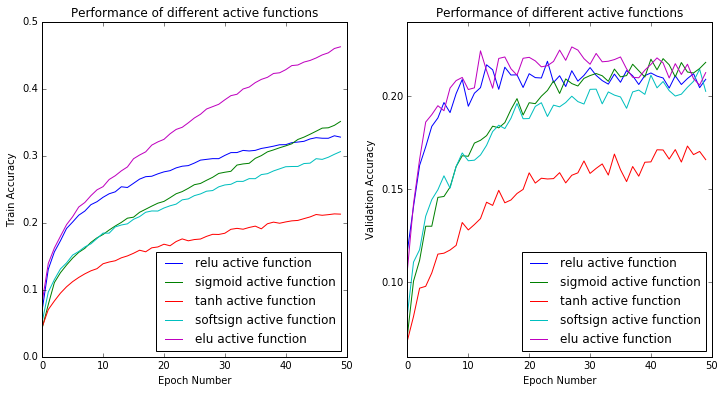

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

line_name = ['relu active function','sigmoid active function','tanh active function','softsign active function','elu active function']
x = np.arange(50) #50 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
# Sets x-axis
ax1.set_xlabel('Epoch Number')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Performance of different active functions")

ax2.set_xlabel('Epoch Number')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Performance of different active functions")

for layer_num in range(5):
    ax1.plot(x,train_acc_lists[layer_num],label=line_name[layer_num]) 
    ax2.plot(x,valid_acc_lists[layer_num],label=line_name[layer_num]) 
ax1.legend(loc=0)
ax2.legend(loc=0)
fig.savefig('100_diff_active_func_acc.png')



In [17]:
#Baseline
def fully_connected_layer(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu): 
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
        
    return (weights,biases,outputs)

inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 100
#learning rate
learning_rate = 0.001
train_acc_lists = [[] for i in range(100)]
train_err_lists = [[] for i in range(100)]
valid_acc_lists = [[] for i in range(100)]
valid_err_lists = [[] for i in range(100)]


with tf.name_scope('fc-layer-1'):
    (hidden1_weights,hidden1_biases,hidden_1) = fully_connected_layer(inputs, train_data.inputs.shape[1], num_hidden)


with tf.name_scope('output-layer'):
    (out_weights,out_biases,outputs) = fully_connected_layer(hidden_1, num_hidden, train_data.num_classes, tf.identity)


with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))

with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(error)


init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)

    for e in range(100):

        running_error = 0.
        running_accuracy = 0.
        for input_batch, target_batch in train_data:
            _, batch_error, batch_acc = sess.run(
                [train_step, error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            running_error += batch_error
            running_accuracy += batch_acc
        running_error /= train_data.num_batches
        running_accuracy /= train_data.num_batches

        train_acc_lists[0].append(running_accuracy)
        train_err_lists[0].append(running_error)
        print('End of epoch {0:02d}: err(train)={1:.2f} acc(train)={2:.2f}'
              .format(e + 1, running_error, running_accuracy))

        valid_error = 0.
        valid_accuracy = 0.
        for input_batch, target_batch in valid_data:
            batch_error, batch_acc = sess.run(
                [error, accuracy], 
                feed_dict={inputs: input_batch, targets: target_batch})
            valid_error += batch_error
            valid_accuracy += batch_acc
        valid_error /= valid_data.num_batches
        valid_accuracy /= valid_data.num_batches

        valid_acc_lists[0].append(valid_accuracy)
        valid_err_lists[0].append(valid_error)
        print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
               .format(valid_error, valid_accuracy))


End of epoch 01: err(train)=4.42 acc(train)=0.05
                 err(valid)=4.22 acc(valid)=0.06
End of epoch 02: err(train)=4.08 acc(train)=0.09
                 err(valid)=3.99 acc(valid)=0.10
End of epoch 03: err(train)=3.92 acc(train)=0.11
                 err(valid)=3.91 acc(valid)=0.12
End of epoch 04: err(train)=3.83 acc(train)=0.13
                 err(valid)=3.84 acc(valid)=0.13
End of epoch 05: err(train)=3.76 acc(train)=0.14
                 err(valid)=3.78 acc(valid)=0.14
End of epoch 06: err(train)=3.70 acc(train)=0.15
                 err(valid)=3.75 acc(valid)=0.14
End of epoch 07: err(train)=3.66 acc(train)=0.16
                 err(valid)=3.70 acc(valid)=0.16
End of epoch 08: err(train)=3.62 acc(train)=0.17
                 err(valid)=3.67 acc(valid)=0.16
End of epoch 09: err(train)=3.59 acc(train)=0.17
                 err(valid)=3.67 acc(valid)=0.16
End of epoch 10: err(train)=3.55 acc(train)=0.18
                 err(valid)=3.63 acc(valid)=0.16
End of epoch 11: err

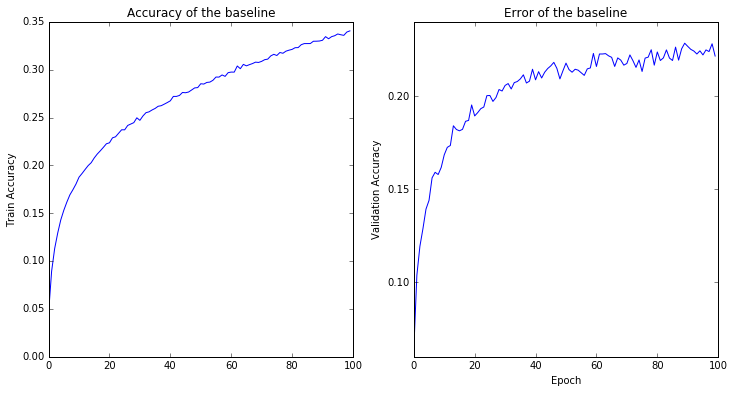

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(100) #30 epoch

# plot train accuracy
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Sets x-axis
#ax1.set_xlabel('Epoch')
# Sets y-axis
ax1.set_ylabel('Train Accuracy')
# Sets title
ax1.set_title("Accuracy of the baseline")

ax2.set_xlabel('Epoch')
# Sets y-axis
ax2.set_ylabel('Validation Accuracy')
# Sets title
ax2.set_title("Error of the baseline")




ax1.plot(x,train_acc_lists[0]) 
ax2.plot(x,valid_acc_lists[0]) 

ax1.legend(loc=0)
ax2.legend(loc=0)

fig.savefig('100_baseline.png')

## Predicting test data classes and creating a Kaggle submission file

An optional [Kaggle in Class](https://inclass.kaggle.com/c/ml2016-7-cifar-100) competition (see email for invite link, you will need to sign-up with a `ed.ac.uk` email address to be able to enter) is being run on the CIFAR-100 (fine-grained) classification task. The scores for the competition are calculated by calculating the proportion of classes correctly predicted on the test set inputs (for which no class labels are provided). Half of the 10000 test inputs are used to calculate a public leaderboard score which will be visible while the competition is in progress and the other half are used to compute the private leaderboard score which will only be unveiled at the end of the competition. Each entrant can make up to two submissions of predictions each day during the competition.

The code and helper function below illustrate how to use the predicted outputs of the TensorFlow network model we just trained to create a submission file which can be uploaded to Kaggle. The required format of the submission file is a `.csv` (Comma Separated Variable) file with two columns: the first is the integer index of the test input in the array in the provided data file (i.e. first row 0, second row 1 and so on) and the second column the corresponding predicted class label as an integer between 0 and 99 inclusive. The predictions must be preceded by a header line as in the following example

```
Id,Class
0,81
1,35
2,12
...
```

Integer class label predictions can be computed from the class probability outputs of the model by performing an `argmax` operation along the last dimension.

In [13]:
test_inputs = np.load(os.path.join(os.environ['MLP_DATA_DIR'], 'cifar-100-test-inputs.npz'))['inputs']
test_predictions = sess.run(tf.nn.softmax(outputs), feed_dict={inputs: test_inputs})

In [11]:
def create_kaggle_submission_file(predictions, output_file, overwrite=False):
    if predictions.shape != (10000, 100):
        raise ValueError('predictions should be an array of shape (10000, 25).')
    if not (np.all(predictions >= 0.) and 
            np.all(predictions <= 1.)):
        raise ValueError('predictions should be an array of probabilities in [0, 1].')
    if not np.allclose(predictions.sum(-1), 1):
        raise ValueError('predictions rows should sum to one.')
    if os.path.exists(output_file) and not overwrite:
        raise ValueError('File already exists at {0}'.format(output_file))
    pred_classes = predictions.argmax(-1)
    ids = np.arange(pred_classes.shape[0])
    np.savetxt(output_file, np.column_stack([ids, pred_classes]), fmt='%d',
               delimiter=',', header='Id,Class', comments='')

In [12]:
create_kaggle_submission_file(test_predictions, 'cifar-100-example-network-submission.csv', True)